## Very Deep Convolutional Networks for Large-Scale Image Recognition

---

## 1. Introduction

**AlexNet**(2012) 이후로, Image Recognition을 위한 CNN 기법을 발전시키기 위해 다양한 노력들이 있어왔다. 

그 중, 이 paper는 ConvNet의 **depth**와 그에 적합한 작은 size의 convolution filter에 포커스를 맞추어 기존의 ConvNet을 발전시킨 논문이다.

---

## 2.ConvNet Configurations

**``depth``**의 효과를 확인하고 싶기 때문에, depth를 제외한 나머지의 setting은 동일하게 설정하고, depth를 달리 하며 성능을 측정한다. configuration setting은 대부분 AlexNet을 참고하였다.

### 2.1. Architecture
* Input: 224 x 224 RGB image, with subtracting the mean RGB value
* Convolutional Filter: 3 x 3 size with every filter except for one (1 x 1 filter).
* Convolutional stride & padding: stride = 1, padding = spatial resolution is preserved(1 for 3 x 3 filter)
* Max pooling layers: 5 layer, each performed over 2 x 2 pixel window with stride 2
* Fully-Connected layers: 3 layer, (, 4096), (4096, 4096), (4096, 1000) respectively
* Final layer: soft-max layer
* Activation function for hidden layers: ReLU
* Local response normalization: only for 1 layer

### 2.2. Configurations
5개의 model을 만들 것이다.

각 model의 configuration은 다음과 같다.

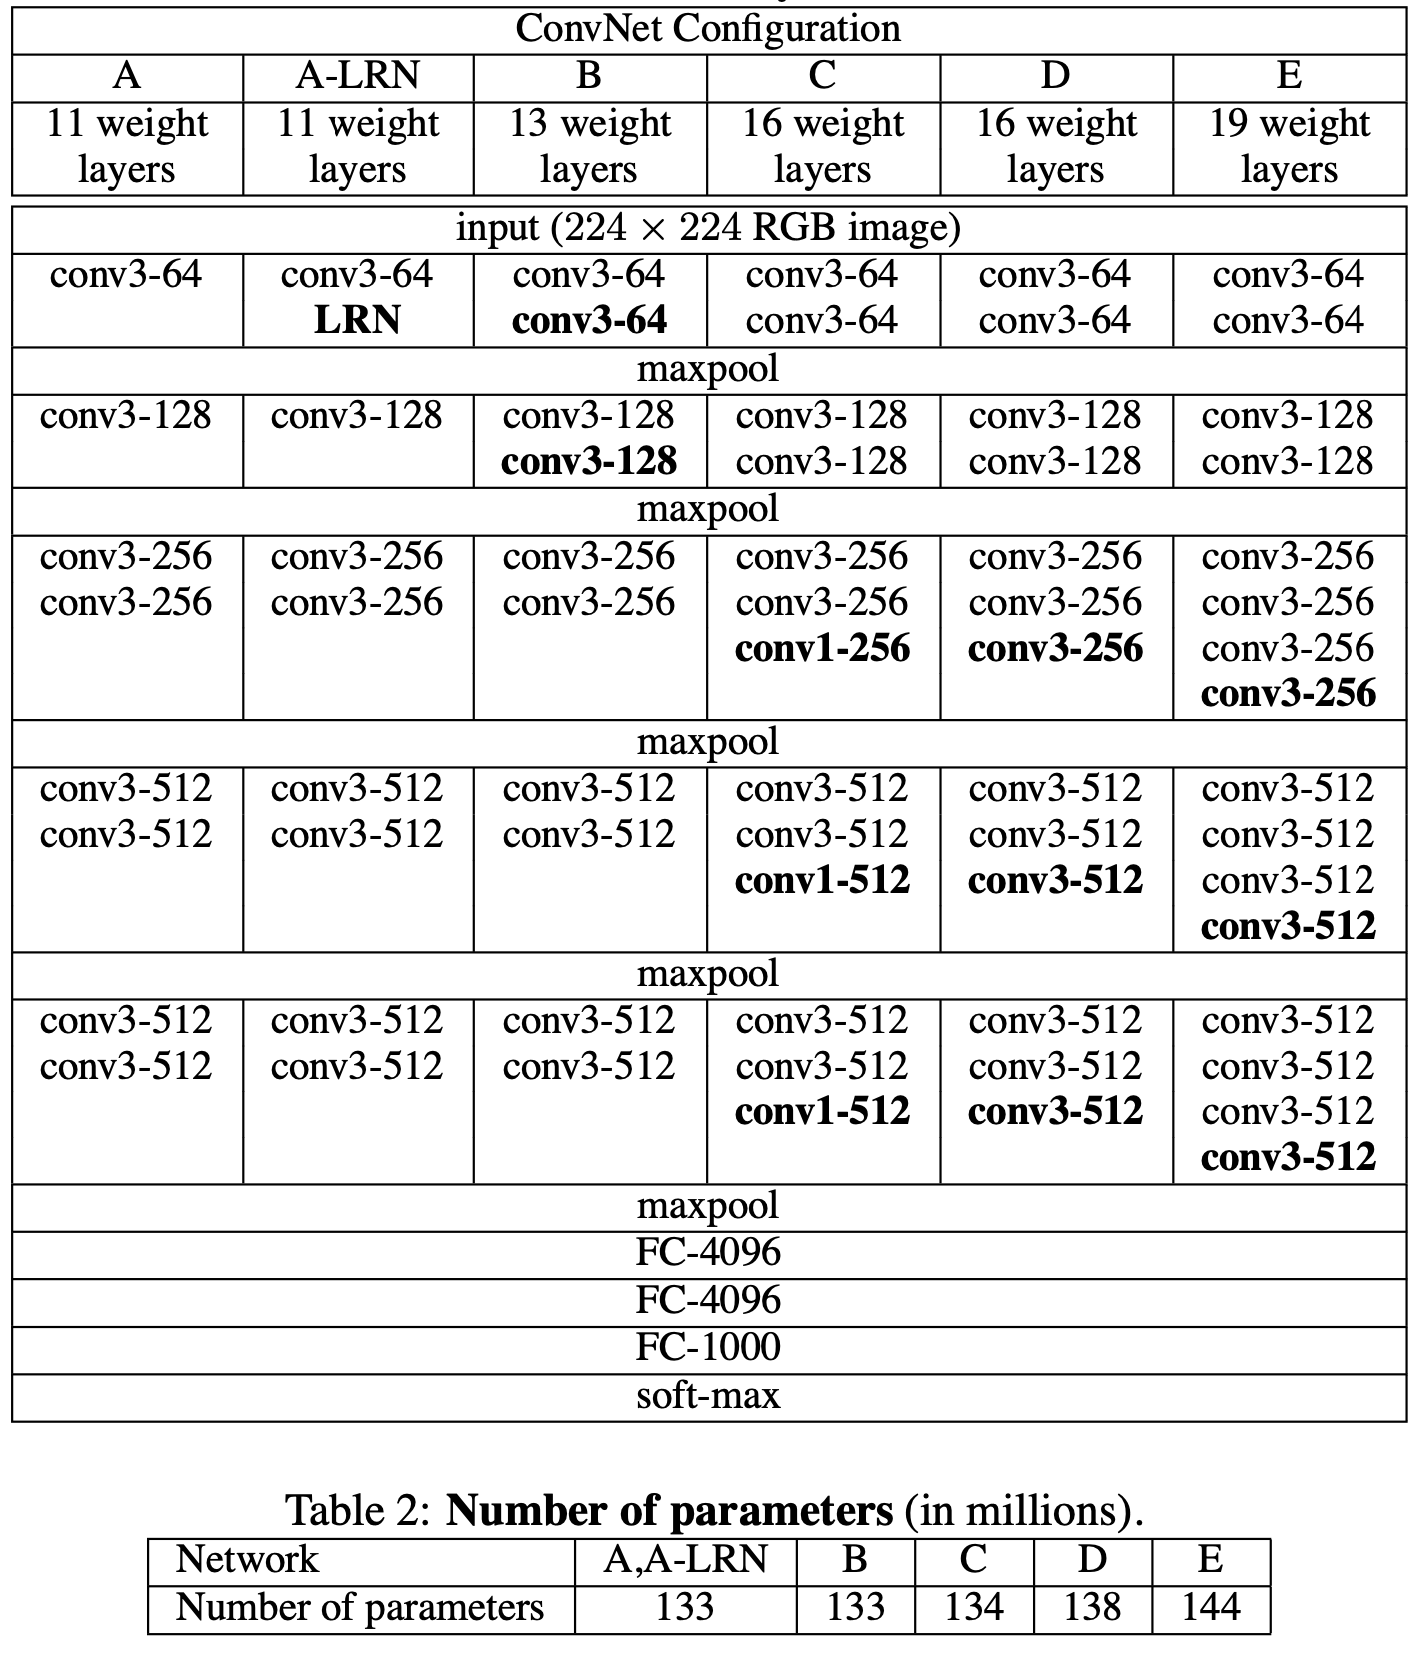

In [2]:
from PIL import Image
Image.open('Image/ConvNet Config.png')

$$ {1 \over n+2} < {a_n \over k} < {1 \over n} $$

$$ {a_n \over a_n(n+2)} < {a_n \over k} < {a_n \over a_n*n} $$

$a_n$과 $n$이 자연수이므로, $a_n*n$과 $a_n(n+2)$ 사이에는 항상 1개 이상의 자연수 k가 존재

따라서, $a_n$이 자연수이면, $a_{n+1}$도 자연수

### 2.3. Discussion
#### 3x3 conv. filter
3x3 conv. filter를 겹겹히 3개를 쌓는 것은, 사실 7x7 conv. filter를 한개 사용하는 것과 유사하다. 하지만 몇가지 특성에서 차이점을 보이는데,
1. 3x3 conv filter 3개를 사용한다는 것은, non-linear activation이 3번 포함된다는 의미로 decision function가 더욱 discriminative해진다.
2. 3x3 conv filter 3개가 7x7 conv filter 1개보다 훨씬 더 적은 parameter를 가지고 있다. 

#### 1x1 conv filter
ConvNet C에는 1x1 conv filter가 포함되어있는데, 이는 역시 non-linearity function을 더해주는 효과를 가진다.

---

## 3. Classification Framework

**Training** and **Evaluation** of classificaiton ConvNet

### 3.1 Training
여러가지 하이퍼파라미터는 생략.

#### Initialization of the network weight
network가 매우 deep하기 때문에, 초기값 설정이 매우 중요하다.
이런 경우 보통 많이 쓰이는 방식이 간단한 model을 training시키고 그 model의 weight을 가져오는 방식인데, 이 paper에서 해당 방법을 사용하였다.

위의 표를 보면, configuration A를 사용한 net A는 비교적으로 구조가 간단함을 알 수 있다. 따라서 net A를 random initialization을 반복하며 학습시키고, 이렇게 구한 net의 weight을 다른 net을 설계할 때의 초기값으로 사용한다. 물론 새로운 net은 net A에 비해 더 많은 layer를 가지고 있으므로 몇몇 layer는 randomly initialized되어야 한다.

#### Training Input Image
training에 사용할 input image는 2가지 변형 과정을 거친다.

1. rescaling
        rescale된 training image의 짧은 변의 길이를 S라고 하면, S를 어떻게 정할 지(어떤 사이즈로 rescaling 할 지)가 중요한 문제이다.
        크게는 두가지 방법이 있는데, 256이나 384 등의 고정된 값으로 S를 정하는 방법이 있는가하면, 반대로 특정 범위 (256 ~ 512) 사이의 S를 random하게 정하는 방법도 있다.
2. Cropping to 224 x 224
        어쨌든 model의 input으로 사용하기 위해서는 224 x 224 size의 image로의 변환이 필요한데, 본 paper는 위에서 rescale한 image를 randomly crop한다. AlexNet이 한 image를 n개로 crop하는 것에 비해, 이 model에서는 1개만 crop하므로 data augmentation이 부족하다. 따라서 (AlexNet에서 사용했던)random horizontal flipping이나 random RGB color shift 등의 방법을 추가로 사용한다.